# Python Pandas

Name:

ID:

Date:

## About
In this lab you will take your knowledge of Python 3 and learn how to use the Pandas and MatPlotLib libraries.

### Learning Outcomes
Upon completing this lab you will be able to: - Understand the Pandas and MatPlotLib libraries - Manipulate data with Pandas - Plot data with MatPlotLib.

### Requirements
To complete this lab you will need:

* Anaconda Distribution of Python3.
* A clone of the mafudge/datasets repository on Github: https://github.com/mafudge/datasets this should be placed in your home directory where you are doing this lab.

NOTE: We can’t teach you everything about Pandas and MathPlotLib, that’s why we recommend the following resources:

* The Pandas Tutorial: http://pandas.pydata.org/pandas-docs/stable/tutorials.html
* The MatPlotLib Beginner’s Guide: http://matplotlib.org/users/beginner.html

Note: This lab is adapted from: http://classes.ischool.syr.edu/ist718/content/unit02/lab-pandas/

## Pandas: The Basics
Pandas is an open-source library for data analysis in Python. Pandas makes it simple to structure and manipulate data.

### Getting Started
* Create a new Notebook in Jupyter and rename it Pandas Basic
* In the first cell, import the pandas and numpy libraries, execute the following:

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series

* Pandas uses two key data structures the Series and the DataFrame. A Series is a special labeled list of values. A DataFrame is a dictionary of Series and is used to represent tables of data. Let’s begin by making a series, type:

In [2]:
days = Series(['Mon','Tue','Wed','Thu','Fri'])
days

0    Mon
1    Tue
2    Wed
3    Thu
4    Fri
dtype: object

* Likewise let’s create a Pandas DataFrame by creating a dictionary of two labeled lists (a.k.a Series). The two series in this example are Day and Sold these represent the column in our DataFrame, and the list of items for each are the data points. Type:

In [3]:
sales = DataFrame( {'Day' : ['Mon','Tue','Wed','Thu','Fri'], 'Sold': [45,55,60,70,65]})
sales

,Day,Sold
0,Mon,45
1,Tue,55
2,Wed,60
3,Thu,70
4,Fri,65


## Understanding DataFrames
* We can get a list of columns in our DataFrame. Type and execute this:

In [4]:
sales.columns

Index(['Day', 'Sold'], dtype='object')

In [6]:
sales.Sold

0    45
1    55
2    60
3    70
4    65
Name: Sold, dtype: int64

NOTE: We could have also indexed the column by dictionary key like this sales['Sold'] to get the same results

In [7]:
sales['Sold']

0    45
1    55
2    60
3    70
4    65
Name: Sold, dtype: int64

We can use Python array slice notation to retrieve a subset of rows from the DataFrame. Type and execute this: 

In [8]:
sales[0:2]

,Day,Sold
0,Mon,45
1,Tue,55


When we execute a boolean expression against a column we get back a Series with the expression evaluated, indicating which rows are True or False. For example, type and execute this: 

In [9]:
sales.Sold >= 60

0    False
1    False
2     True
3     True
4     True
Name: Sold, dtype: bool

This is useful when we want to <b>filter</b> rows from the DataFrame. For example this will retrieve only rows with Sold bigger than or equal to 60. Type and execute: 

In [10]:
sales[sales.Sold >= 60]

,Day,Sold
2,Wed,60
3,Thu,70
4,Fri,65


We can combine approaches to filter rows and then get a single Series, in this case the Day Series. Type and execute: 

In [12]:
sales[sales.Sold >= 60].Day

2    Wed
3    Thu
4    Fri
Name: Day, dtype: object

## Adding Columns to the DataFrame
It’s common practice add your own Series to an existing DataFrame. In this example we will calculate the Percentage Of Total for the Sold column as a Series then and create a new column PoT in our sales DataFrame.

* First let’s calculate the total sold by calling sum() on the series Sold. Type and execute: 

In [14]:
total = sales.Sold.sum()
total

295

Next we create a new Series from sales.Sold by dividing each item in the series by total. Type and execute: 

In [16]:
pot = sales.Sold / total
pot

0    0.152542
1    0.186441
2    0.203390
3    0.237288
4    0.220339
Name: Sold, dtype: float64

Then we use the insert() method to add the Series to the sales DataFrame at position 2 (the end position) with the column name PoT. Type and execute: 

In [19]:
sales.insert(2,'PoT',pot)
sales

,Day,Sold,PoT
0,Mon,45,0.152542
1,Tue,55,0.186441
2,Wed,60,0.203390
3,Thu,70,0.237288
4,Fri,65,0.220339


Now that the column is part of the DataFrame we can use it in filters and column selections. In this example we retrieve rows with a Percentage of Total over 20% and return back a DataFrame of just the Day and PoT Series. 

In [21]:
sales[sales.PoT > 0.2][['Day','PoT']]

,Day,PoT
2,Wed,0.203390
3,Thu,0.237288
4,Fri,0.220339


NOTE: The brackets [] around 'Day' and 'PoT' retrieve both Series. A collection of Series is a DataFrame in Pandas this is why the results returned are a DataFrame.

## Reading from Files and Plotting
In this final part of the Walk-Through, we will load data from the Superhero Movie Dataset perform some simple manipulations and plot the data as a means of exploring the features in this dataset.

* Create a new Notebook in Jupyter and rename it Pandas Advanced
* In the first cell, include the following Python packages. Type and execute:

In [22]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
%matplotlib inline

* Notice the %matplotlib inline statement. This asks Jupyter to render the plots underneath the code.
* First let’s read the data from the file using Pandas’ read_csv() method. Since this particular data set does not include a header row, we must name each Series in the file. Type in this code:


In [24]:
sh_raw = pd.read_csv('datasets/superhero/superhero-movie-dataset-1978-2012.csv',
    header=None,
    names=['Year','Title','Comic','IMDB','RT','CompositeRating','OpeningWeekendBoxOffice',
    'AvgTicketPriceThatYear','EstdOpeningAttendance','USPopThatYear'])
sh_raw.head(5)

,Year,Title,Comic,IMDB,RT,CompositeRating,OpeningWeekendBoxOffice,AvgTicketPriceThatYear,EstdOpeningAttendance,USPopThatYear
0,1978,Superman,DC,7.3,95,84.0,7465343.0,2.34,3190317.521,222584545
1,1980,Superman II,DC,6.7,88,77.5,14100523.0,2.69,5241830.112,227224681
2,1982,Swamp Thing,DC,5.3,60,56.5,NaN,2.94,NaN,231664458
3,1983,Superman III,DC,4.9,24,36.5,13352357.0,3.15,4238843.492,233791994
4,1984,Supergirl,DC,4.2,8,25.0,5738249.0,3.36,1707812.202,235824902


NOTE: There’s a scroll bar at the bottom of the output so you can view all the columns.

* Since we will be analyzing box office numbers, we need to clean up the dataset and exclude movies where this data is missing. those columns have Not a Number NaN in the OpeningWeekendBoxOffice Series. We will use the Numpy function isfinite() to check for value numbers in this column. Type and execute: 

In [32]:
sh = sh_raw[np.isfinite(sh_raw.OpeningWeekendBoxOffice)]
sh.head(5)

,Year,Title,Comic,IMDB,RT,CompositeRating,OpeningWeekendBoxOffice,AvgTicketPriceThatYear,EstdOpeningAttendance,USPopThatYear
0,1978,Superman,DC,7.3,95,84.0,7465343.0,2.34,3190317.521,222584545
1,1980,Superman II,DC,6.7,88,77.5,14100523.0,2.69,5241830.112,227224681
3,1983,Superman III,DC,4.9,24,36.5,13352357.0,3.15,4238843.492,233791994
4,1984,Supergirl,DC,4.2,8,25.0,5738249.0,3.36,1707812.202,235824902
5,1986,Howard the Duck,Marvel,4.3,16,29.5,5070136.0,3.71,1366613.477,240132887


You’ll notice Swamp Thing has been omitted from the output. That is because we did not have the OpeningWeekendBoxOffice value for this title.

* With our dataset cleaned, we now add the calculated columns required to perform our analysis. We’d like to compare Rotten Tomatoes ratings to IMDB ratings but we have to normalize them first. Enter the following code into a new cell and execute it. You should not see any output.

In [33]:
# Normalize the scores
imdb_normalized = sh.IMDB / 10   # IMDB scores out of 10
sh.insert(9,'IMDBNormalized', imdb_normalized)
rt_normalized = sh.RT/100        # RT scores out of 100
sh.insert(9, 'RTNormalized', rt_normalized)


## Plots, Distributions and Correlations
* With our scores normalized, let’s make our first scatter plot, and explore the relationship between Rotten Tomatoes and IMDB ratings for each movie. Type and execute the following:

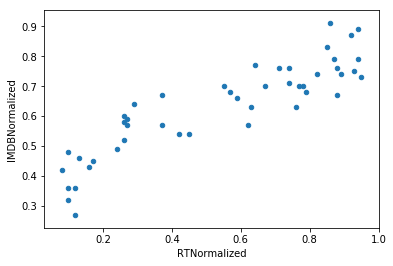

In [34]:
sh.plot.scatter(x = 'RTNormalized', y = 'IMDBNormalized')

* At a glance you can see there’s a positive correlation, which one might suspect. It would be nice to calculate the correlation coefficient and verify how strong of a correlation. Lucky for us Pandas provides a corr() method to calculate correlations. Rather than do this to the entire DataFrame, we select the two columns in question. Type and execute the following: 

In [40]:
sh[['IMDBNormalized','RTNormalized']].corr()

,IMDBNormalized,RTNormalized
IMDBNormalized,1.00000,0.88836
RTNormalized,0.88836,1.00000


The correlation is 0.88836 which is a high positive correlation.

* The Pandas describe() method makes it easy to get summary statistics for our data, including mean, standard deviation, and percentiles. Type and execute the following: 

In [41]:
sh[['IMDBNormalized','RTNormalized']].describe()

,IMDBNormalized,RTNormalized
count,46.000000,46.000000
mean,0.630000,0.539783
std,0.152898,0.302129
min,0.270000,0.080000
25%,0.540000,0.260000
50%,0.665000,0.605000
75%,0.740000,0.812500
max,0.910000,0.950000


From the output its interesting to note from the 25th percentile (25%) Rotten Tomatoes has more lower ratings for the same movies than IMDB.

## Advanced Plotting
* Suppose we want to plot the Estimated Opening Attendance against the IMDB and Rotten Tomatoes scores. We need two Series on our scatter plot. We do this by assigning the plot to a variable, in this case we use plt and then in the next plot call we include ax=plt to incorporate the first plot into the second one. While we’re at it we set the axis labels to more meaningful values. Type in the following code:

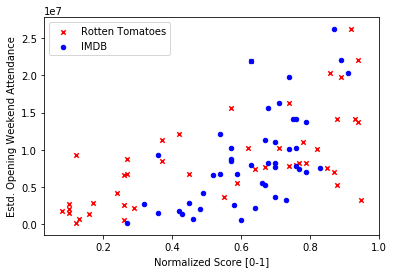

In [43]:
plt = sh.plot.scatter(x='RTNormalized',y='EstdOpeningAttendance', marker='x', color='Red', label='Rotten Tomatoes')
plt = sh.plot.scatter(x='IMDBNormalized',y='EstdOpeningAttendance', marker='o', ax=plt, color='Blue', label='IMDB')
plt.set_xlabel("Normalized Score [0-1]")
plt.set_ylabel("Estd. Opening Weekend Attendance")
plt

For each Series, we’ve included a different marker=, color=, and label= so the viewer can differentiate between IMDB and Rotten Tomatoes data points. Neato!

* How about a trendline? For this final example, let’s compare the Average Ticket Price to the Year the movie was released. We will then add a trend line to the data points. To accomplish this we create another Series using Numpy’s polyfit() method to perform a least-squares polynomial fit over our data. Once we have the series, p, we then add it to a DataFrame and then plot it as a line() in color='Green'. Type in the following code in a new cell:

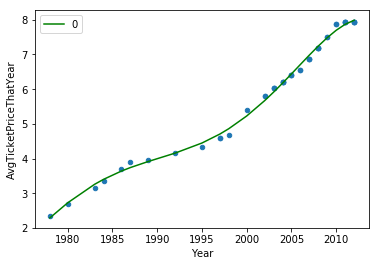

In [44]:
plt = sh.plot.scatter(x = 'Year', y='AvgTicketPriceThatYear')
z = np.polyfit(x=sh.Year,y=sh.AvgTicketPriceThatYear, deg=5)
p = np.poly1d(z)
trendline = pd.DataFrame(data=p(sh.Year), index=sh.Year)
trendline.plot.line(ax=plt, color='Green')

When you execute the cell you will see our data and the trend line: 

NOTE: The argument deg=5 represents a 5th degree polynomial. For a straight line, change this to deg=1 and execute again.

## Test Yourself
1. Define a Pandas Series.
* Define a Pandas DataFrame, use the term Series in your definition.
* In Pandas, how would you only show 'DC' comic movies from the sh DataFrame?
* In Pandas, how would you only show the Year, Title and OpeningWeekendBoxOffice columns from DataFrame sh?
* In Pandas, how would you only show the Year and Title of only 'Marvel' movies from DataFrame sh?
* Write a command to plot a line() AvgTicketPriceThatYear with Year on the x axis. Make the line Black.

## Part 3 On Your Own
### Instructions
Open a new Notebook called <b>lab02_fname_lname.ipynb</b>. Write code in seperate cells to answer each question.

### Questions
Write each program in its own cell.

1. Load the 'datasets/exam-scores/exam-scores.csv' into a pandas DataFrame called scores. Note since this data set has headers, you can omit the header=None and names= arguments.
* Write a program to determine if there is a correlation between a Student’s score and the time it took them to complete the examination. Is there such a correlation?
* Filter the scores for exam version 'D' only. what does the correlation look like now? Is it different? How so?
* Let’s the relationship between students who Made their own study guide and their exam score. Create a variable study containing the columns 'Made Own Study Guide', 'Student Score' and removes the rows with '?' in the Made Own Study Guide column. The output should look like this: 

| |Made Own Study Guide|Student Score|
|-|--------------------|-------------|
|0|N                   |24           |
|2|Y                   |30           |
|3|N                   |18           |
|4|Y                   |24           |
|5|N                   |25           |
5) Next we need to convert the Made Own Study Guide to a numeric value. To do this we will create a new series and add it to the DataFrame. Hint: use a list comprehension to evaluate 'Y' or 'N' and convert them to 1 or 0 respectively. When you’re done your study DataFrame should look like this:

| |Made Own Study Guide|Student Score|Study Guide Value|
|-|--------------------|-------------|-----------------|
|0|N                   |24           |0                |
|2|Y                   |30           |1                |
|3|N                   |18           |0                |
|4|Y                   |24           |1                |
|5|N                   |25           |0                |
6) What is the correlation between the 'StudyGuideValue' and Exam Scores? Plot a scatter with 'StudyGuideValue' on the x axis, and include a screen shot.

In [45]:
import pandas as pd

In [50]:
# 1. Load the 'datasets/exam-scores/exam-scores.csv' into a pandas DataFrame called scores. Note since this data set has headers, you can omit the header=None and names= arguments.
exam = pd.read_csv("https://raw.githubusercontent.com/mafudge/datasets/master/exam-scores/exam-scores.csv")
exam.head(5)

,Class_Section,Exam_Version,Completion_Time,Made_Own_Study_Guide,Did_Exam_Prep Assignment,Studied_In_Groups,Student_Score,Percentage,Letter_Grade
0,M01,A,20,N,N,Y,24,80.00%,B
1,M01,A,20,?,?,?,27,90.00%,A-
2,M01,A,30,Y,Y,Y,30,100.00%,A
3,M01,A,50,N,Y,Y,18,60.00%,C-
4,M01,A,55,Y,Y,N,24,80.00%,B


In [51]:
# 2. Write a program to determine if there is a correlation between a Student’s score and the time it took them to complete the examination. Is there such a correlation?
exam[['Completion_Time','Student_Score']].corr()

,Completion_Time,Student_Score
Completion_Time,1.000000,0.057516
Student_Score,0.057516,1.000000


There is no correlation between completion time and student score.

In [53]:
# 3. Filter the scores for exam version 'D' only. what does the correlation look like now? Is it different? How so?
d_exam = exam[exam.Exam_Version == 'D']
d_exam[['Completion_Time','Student_Score']].corr()

,Completion_Time,Student_Score
Completion_Time,1.000000,0.287306
Student_Score,0.287306,1.000000


There are about 28% correlation between completion time and student score for D version exams.

In [58]:
# 4. Let’s the relationship between students who Made their own study guide and their exam score. Create a variable study containing the columns 'Made Own Study Guide', 'Student Score' and removes the rows with '?' in the Made Own Study Guide column. The output should look like this:
# filter by none ? and then select columns...
exam1 = exam[exam.Made_Own_Study_Guide != '?'][['Made_Own_Study_Guide','Student_Score']]

In [60]:
# 5. Next we need to convert the Made Own Study Guide to a numeric value. To do this we will create a new series and add it to the DataFrame. Hint: use a list comprehension to evaluate 'Y' or 'N' and convert them to 1 or 0 respectively. When you’re done your study DataFrame should look like this:
list = []
for x in exam1.Made_Own_Study_Guide:
    if x == 'Y':
        list.append(1)
    else:
        list.append(0)
exam1.insert(2,'Study_Guide_Value',list)

In [63]:
# 6.  What is the correlation between the 'StudyGuideValue' and Exam Scores? Plot a scatter with 'StudyGuideValue' on the x axis, and include a screen sho
exam1[['Study_Guide_Value','Student_Score']].corr()

,Study_Guide_Value,Student_Score
Study_Guide_Value,1.000000,0.399788
Student_Score,0.399788,1.000000


High correlation between made own study guide and the student score.

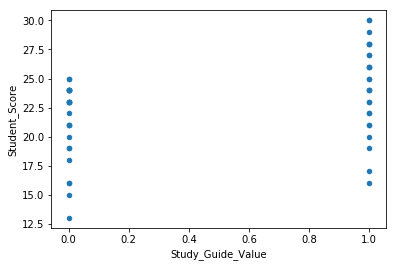

In [66]:
exam1.plot.scatter(x='Study_Guide_Value', y='Student_Score')

Those who made their study guide has a litte higher score.